In [1]:
#load packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from functions import get_closest_TADs

In [2]:
file_path = "../data/bart3d_rep/"

#create lst of chr IDs
chromosomes = ['chr'+str(i) for i in range(1,23)] + ['chrX','chrY']
#load data
bart3d_out_dirs = os.listdir(file_path)
bart3d_out_dirs = [directory for directory in bart3d_out_dirs if 'vs' in directory]
bart3d_out_dirs

['PGCLC_24k_vs_Naive_25k', 'PGCLC_12k_vs_Naive_10k', 'PGCLC_25k_vs_Naive_500k']

In [3]:
#define dict to hold all dfs
bart3d_out_dict = {}
#define filtering params
hic_depth = 40000
out_suffix = 'differential_score.bed'

for pairs in bart3d_out_dirs:
    
    print('Current pair: {}'.format(pairs))
    samples = pairs.split('_vs_') ##get sample IDs, ex: PGCLC_24k and Naive_25k
    filename = '{}_{}_OVER_{}_{}_{}'.format(samples[0],hic_depth,samples[1],hic_depth,out_suffix)
    #read-in dataframe with results
    result_df = pd.read_table('{}{}/{}'.format(file_path,pairs,filename), header=None)
    result_df.columns = ["Chr","Start","End","DCI_Score"]
    
    #add df to dict
    bart3d_out_dict[pairs] = result_df

Current pair: PGCLC_24k_vs_Naive_25k
Current pair: PGCLC_12k_vs_Naive_10k
Current pair: PGCLC_25k_vs_Naive_500k


In [4]:
#save bart3d_out_dict as pickle
with open('../output/bart3d_DCIs.pickle', 'wb') as handle:
    pickle.dump(bart3d_out_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Close DCI calculation

In [5]:
#find closest TADs between the following dataframes
df1 = bart3d_out_dict[bart3d_out_dirs[0]].copy()
df2 = bart3d_out_dict[bart3d_out_dirs[1]].copy()
df3 = bart3d_out_dict[bart3d_out_dirs[2]].copy()

In [6]:
#get number of close TADs for different thresholds
df_closeTADs_th = pd.DataFrame(columns=['Threshold', 'CloseTADs'])

for threshold in range(1,11):

    print('Current threshold: {}'.format(threshold))
    df_all_query_th = get_closest_TADs(df1, df2, chromosomes, threshold=threshold)
    df_final_query_th = get_closest_TADs(df_all_query_th, df3, chromosomes, threshold=threshold)
    print('CLOSE TADs: {}'.format(df_final_query_th.shape[0]))

    #count number of close TADs per chromosome
    df_closeTADs_i = pd.DataFrame(columns=['Threshold', 'Chr', 'CloseTADs'])
    for chrom in chromosomes:
        df_final_query_th_chrom = df_final_query_th[df_final_query_th.Chr==chrom]
        df_to_concat = pd.DataFrame(np.array([[threshold, chrom, df_final_query_th_chrom.shape[0]]]),
                                             columns=['Threshold', 'Chr', 'CloseTADs'])
        df_closeTADs_i = pd.concat([df_closeTADs_i, df_to_concat])
    
    df_closeTADs_th = pd.concat([df_closeTADs_th, df_closeTADs_i])

#format column types
df_closeTADs_th['Threshold'] = df_closeTADs_th['Threshold'].astype("int")
df_closeTADs_th['Chr'] = df_closeTADs_th['Chr'].astype("str")
df_closeTADs_th['CloseTADs'] = df_closeTADs_th['CloseTADs'].astype("int")

Current threshold: 1
CLOSE TADs: 14149
Current threshold: 2
CLOSE TADs: 8934
Current threshold: 3
CLOSE TADs: 5657
Current threshold: 4
CLOSE TADs: 3415
Current threshold: 5
CLOSE TADs: 1909
Current threshold: 6
CLOSE TADs: 1054
Current threshold: 7
CLOSE TADs: 533
Current threshold: 8
CLOSE TADs: 268
Current threshold: 9
Not enough TADs found for chromosome chrY
Not enough TADs found for chromosome chrY
CLOSE TADs: 144
Current threshold: 10
Not enough TADs found for chromosome chr15
Not enough TADs found for chromosome chrY
Not enough TADs found for chromosome chr15
Not enough TADs found for chromosome chr21
Not enough TADs found for chromosome chrX
Not enough TADs found for chromosome chrY
CLOSE TADs: 73


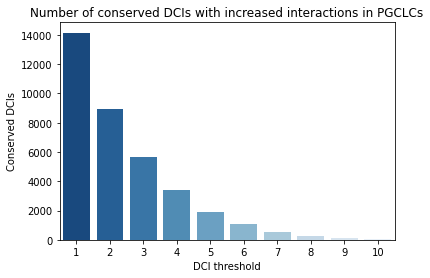

In [7]:
#plot distribution of close TADs
ax = sns.barplot(data=df_closeTADs_th, x='Threshold', y='CloseTADs',
                 palette='Blues_r', estimator=sum, ci=None)
plt.title('Number of conserved DCIs with increased interactions in PGCLCs')
plt.xlabel('DCI threshold')
plt.ylabel('Conserved DCIs')
plt.show()

In [8]:
#repeat for negative thresholds
df_closeTADs_th_neg = pd.DataFrame(columns=['Threshold', 'Chr', 'CloseTADs'])

for threshold in range(-1,-11,-1):

    print('Current threshold: {}'.format(threshold))
    df_all_query_th = get_closest_TADs(df1, df2, chromosomes, threshold=threshold)
    df_final_query_th = get_closest_TADs(df_all_query_th, df3, chromosomes, threshold=threshold)
    print('CLOSE TADs: {}'.format(df_final_query_th.shape[0]))

    #count number of close TADs per chromosome
    df_closeTADs_i = pd.DataFrame(columns=['Threshold', 'Chr', 'CloseTADs'])
    for chrom in chromosomes:
        df_final_query_th_chrom = df_final_query_th[df_final_query_th.Chr==chrom]
        df_to_concat = pd.DataFrame(np.array([[threshold, chrom, df_final_query_th_chrom.shape[0]]]),
                                             columns=['Threshold', 'Chr', 'CloseTADs'])
        df_closeTADs_i = pd.concat([df_closeTADs_i, df_to_concat])
    
    df_closeTADs_th_neg = pd.concat([df_closeTADs_th_neg, df_closeTADs_i])

#format column types
df_closeTADs_th_neg['Threshold'] = df_closeTADs_th_neg['Threshold'].astype("int")
df_closeTADs_th_neg['Chr'] = df_closeTADs_th_neg['Chr'].astype("str")
df_closeTADs_th_neg['CloseTADs'] = df_closeTADs_th_neg['CloseTADs'].astype("int")

Current threshold: -1
CLOSE TADs: 14315
Current threshold: -2
CLOSE TADs: 7363
Current threshold: -3
CLOSE TADs: 3736
Current threshold: -4
CLOSE TADs: 1846
Current threshold: -5
CLOSE TADs: 858
Current threshold: -6
CLOSE TADs: 407
Current threshold: -7
CLOSE TADs: 185
Current threshold: -8
Not enough TADs found for chromosome chr20
Not enough TADs found for chromosome chr22
Not enough TADs found for chromosome chr20
Not enough TADs found for chromosome chr22
CLOSE TADs: 73
Current threshold: -9
Not enough TADs found for chromosome chr4
Not enough TADs found for chromosome chr13
Not enough TADs found for chromosome chr18
Not enough TADs found for chromosome chr19
Not enough TADs found for chromosome chr20
Not enough TADs found for chromosome chr22
Not enough TADs found for chromosome chrY
Not enough TADs found for chromosome chr4
Not enough TADs found for chromosome chr11
Not enough TADs found for chromosome chr13
Not enough TADs found for chromosome chr15
Not enough TADs found for ch

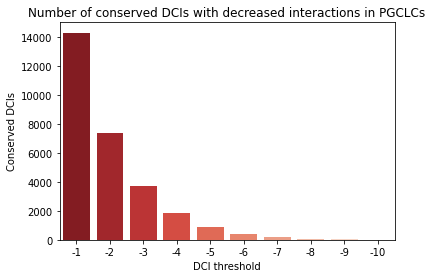

In [9]:
#plot distribution of close TADs
ax = sns.barplot(data=df_closeTADs_th_neg, x='Threshold', y='CloseTADs',
                 palette='Reds_r', order=range(-1,-11,-1), 
                 estimator=sum, ci=None)
plt.title('Number of conserved DCIs with decreased interactions in PGCLCs')
plt.xlabel('DCI threshold')
plt.ylabel('Conserved DCIs')
plt.show()